In [19]:
import sys
sys.path.append('../src/')

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

from scipy.integrate import simps
from benchmark.stats import calc_precision_recall, calc_ap

In [20]:
path = 'mtcnn-20220418-123014'

df = pd.read_csv('./results/{}.tsv'.format(path), sep='\t', header=0, parse_dates=["Timestamp"])
df_ap = pd.read_csv('./results/{}-ap.tsv'.format(path), sep='\t', header=0)
df_ap = df_ap.sort_values(by=['Confidence'], ignore_index=True, ascending=False)
df_load = pd.read_csv('./results/{}-load.tsv'.format(path), sep='\t', header=0, parse_dates=["Timestamp"])
df_meta = pd.read_csv('./results/{}-metadata.tsv'.format(path), sep='\t', header=0)

In [21]:
df_meta

,Python,CPU,GPUs
0,3.8.8.final.0 (64 bit),AMD Ryzen 7 2700X Eight-Core Processor,"['device: 0, name: NVIDIA GeForce GTX 1080 Ti,..."


In [22]:
df_load

,Timestamp,CPU_Load,RAM_Avail
0,2022-04-18 12:30:14.248654,5.3,3241447424
1,2022-04-18 12:30:25.489653,49.3,2593669120
2,2022-04-18 12:30:40.224678,16.7,2310635520


In [23]:
def plot_data_over_time(time, data, label):
    plt.plot(time, data)
    plt.xlabel('Time') 
    plt.ylabel(label)
    plt.grid(True)
    plt.show()

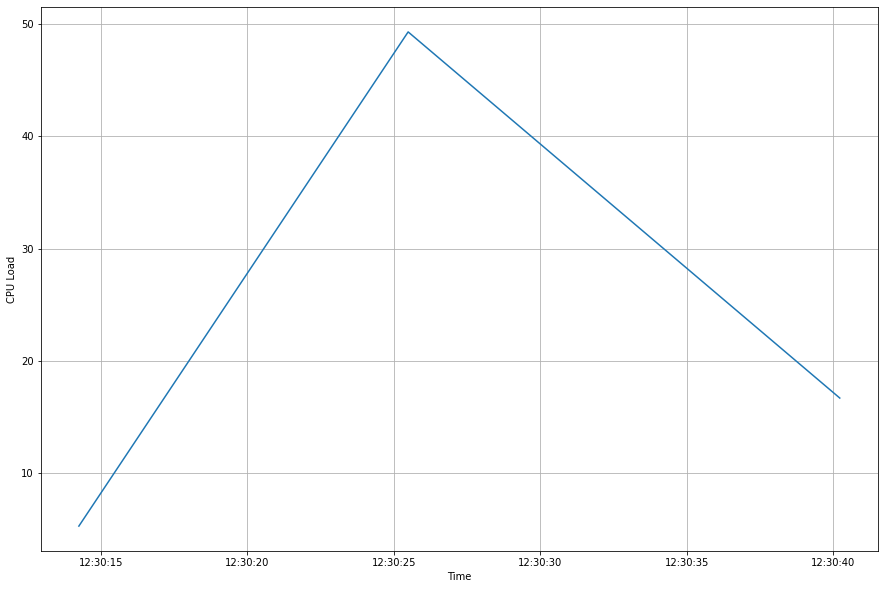

In [24]:
plot_data_over_time(df_load['Timestamp'], df_load['CPU_Load'], 'CPU Load')

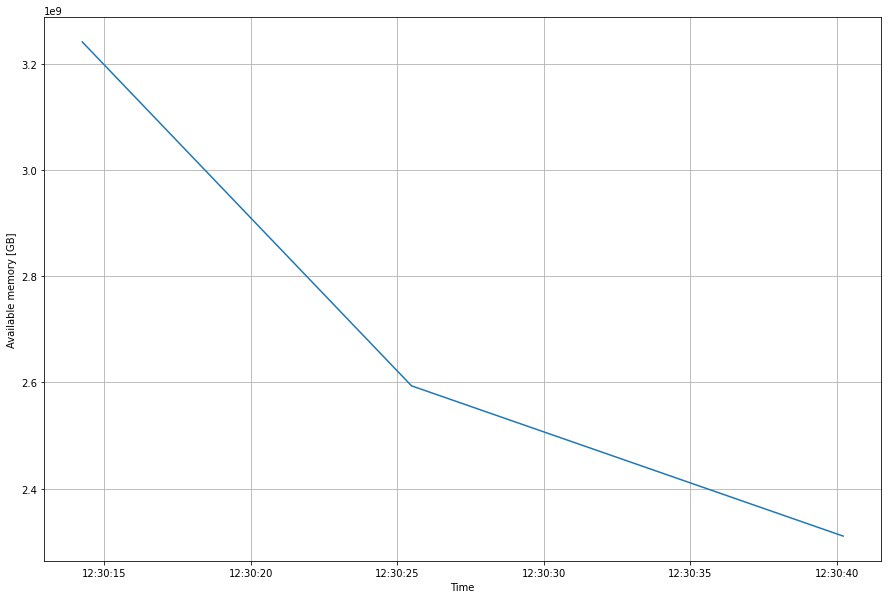

In [25]:
plot_data_over_time(df_load['Timestamp'], df_load['RAM_Avail'], 'Available memory [GB]')

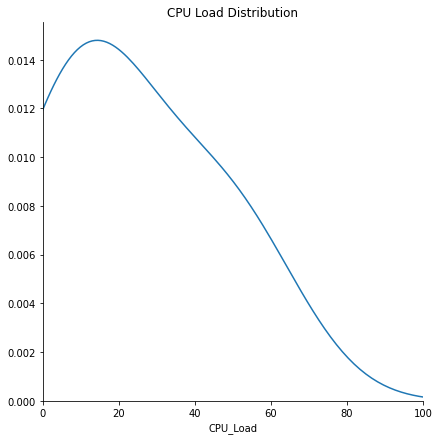

In [26]:
sns.FacetGrid(df_load, height=6).map(sns.kdeplot, 'CPU_Load').add_legend()
plt.title('CPU Load Distribution')
plt.xlim(0, 100)
plt.show()

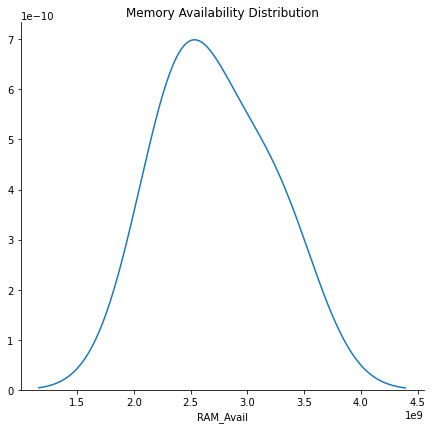

In [27]:
sns.FacetGrid(df_load, height=6).map(sns.kdeplot, 'RAM_Avail').add_legend()
plt.title('Memory Availability Distribution')
plt.show()

In [28]:
df

,Timestamp,Speed,Precision,Recall,F1_Score,Ious,Positives,False_Positives,Negatives,Num_Of_Faces,Predicted,Ground_Truth
0,2022-04-18 12:30:14.986154,298228400,1.000000,1.000000,1.000000,"[0.8915242805755396, 0.8778703002775675, 0.771...",8,0,0,8,"[(176.0, 141.0, 255.0, 245.0), (785.0, 190.0, ...","[(909.0, 335.0, 974.0, 418.0), (786.0, 187.0, ..."
1,2022-04-18 12:30:15.521154,265579500,0.000000,0.000000,0.000000,[],0,0,1,1,[],"[(547.0, 1228.0, 688.0, 1333.0)]"
2,2022-04-18 12:30:16.018153,205970600,1.000000,1.000000,1.000000,"[0.8058647841433614, 0.8445652173913043]",2,0,0,2,"[(551.0, 117.0, 604.0, 174.0), (459.0, 48.0, 4...","[(459.0, 45.0, 499.0, 91.0), (551.0, 107.0, 60..."
3,2022-04-18 12:30:16.574656,206987400,1.000000,0.112903,0.202899,"[0.8086548488008342, 0.7382198952879581, 0.830...",7,0,55,62,"[(61.0, 494.0, 99.0, 541.0), (254.0, 496.0, 29...","[(82.0, 278.0, 90.0, 287.0), (96.0, 272.0, 106..."
4,2022-04-18 12:30:17.077153,249289100,1.000000,1.000000,1.000000,"[0.8859470468431772, 0.8551800965466023, 0.807...",8,0,0,8,"[(268.0, 70.0, 317.0, 128.0), (410.0, 89.0, 45...","[(104.0, 77.0, 152.0, 135.0), (199.0, 78.0, 24..."
5,2022-04-18 12:30:17.649657,327161700,1.000000,0.111111,0.200000,[0.8095238095238095],1,0,8,9,"[(581.0, 745.0, 595.0, 763.0)]","[(439.0, 518.0, 465.0, 560.0), (493.0, 621.0, ..."
6,2022-04-18 12:30:18.308653,386200700,0.800000,0.444444,0.571429,"[0.8363903154805576, 0.7444519166106254, 0.872...",8,2,10,18,"[(133.0, 363.0, 171.0, 430.0), (770.0, 568.0, ...","[(823.0, 342.0, 852.0, 385.0), (768.0, 334.0, ..."
7,2022-04-18 12:30:18.759655,219735400,0.800000,1.000000,0.888889,"[0.915679969737091, 0.7764423076923077, 0.8771...",4,1,0,4,"[(238.0, 89.0, 375.0, 274.0), (819.0, 70.0, 85...","[(242.0, 85.0, 378.0, 271.0), (672.0, 78.0, 70..."
8,2022-04-18 12:30:19.294653,258068100,1.000000,0.461538,0.631579,"[0.5603482390185991, 0.7473601877199844, 0.865...",12,0,14,26,"[(167.0, 549.0, 225.0, 628.0), (65.0, 521.0, 1...","[(914.0, 375.0, 945.0, 406.0), (950.0, 377.0, ..."
9,2022-04-18 12:30:19.792156,265757600,1.000000,1.000000,1.000000,"[0.6829412031370415, 0.6002110817941952, 0.375...",3,0,0,3,"[(304.0, 793.0, 433.0, 964.0), (639.0, 891.0, ...","[(316.0, 800.0, 431.0, 931.0), (617.0, 858.0, ..."


In [29]:
df.describe()

,Speed,Precision,Recall,F1_Score,Positives,False_Positives,Negatives,Num_Of_Faces
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.550426e+08,0.793810,0.709005,0.695372,3.200000,0.266667,3.633333,6.833333
std,8.342384e+07,0.354099,0.413005,0.374857,3.736124,0.583292,10.350690,12.227959
min,1.321947e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.938979e+08,0.735714,0.361111,0.517857,1.000000,0.000000,0.000000,1.000000
50%,2.543524e+08,1.000000,1.000000,0.861111,1.500000,0.000000,0.000000,2.000000
75%,3.045148e+08,1.000000,1.000000,1.000000,4.000000,0.000000,1.000000,7.500000
max,4.722101e+08,1.000000,1.000000,1.000000,15.000000,2.000000,55.000000,62.000000


In [30]:
df_ap

,Confidence,TP_FP@25,TP_FP@50,TP_FP@75
0,1.000000,True,True,True
1,1.000000,True,True,True
2,0.999999,True,True,True
3,0.999999,True,True,True
4,0.999997,True,True,True
...,...,...,...,...
99,0.740889,False,False,False
100,0.736381,False,False,False
101,0.727288,True,True,False
102,0.715057,True,True,False


In [31]:
all_gts = df['Positives'].sum() + df['Negatives'].sum()

df_ap = calc_precision_recall(df_ap, all_gts)

In [32]:
df_ap

,Confidence,TP_FP@25,TP_FP@50,TP_FP@75,Precision@25,Recall@25,Precision@50,Recall@50,Precision@75,Recall@75
0,1.000000,True,True,True,1.000000,0.004878,1.000000,0.004878,1.000000,0.004878
1,1.000000,True,True,True,1.000000,0.009756,1.000000,0.009756,1.000000,0.009756
2,0.999999,True,True,True,1.000000,0.014634,1.000000,0.014634,1.000000,0.014634
3,0.999999,True,True,True,1.000000,0.019512,1.000000,0.019512,1.000000,0.019512
4,0.999997,True,True,True,1.000000,0.024390,1.000000,0.024390,1.000000,0.024390
...,...,...,...,...,...,...,...,...,...,...
99,0.740889,False,False,False,0.940000,0.458537,0.940000,0.458537,0.940000,0.458537
100,0.736381,False,False,False,0.930693,0.458537,0.930693,0.458537,0.930693,0.458537
101,0.727288,True,True,False,0.931373,0.463415,0.931373,0.463415,0.931373,0.463415
102,0.715057,True,True,False,0.932039,0.468293,0.932039,0.468293,0.932039,0.468293


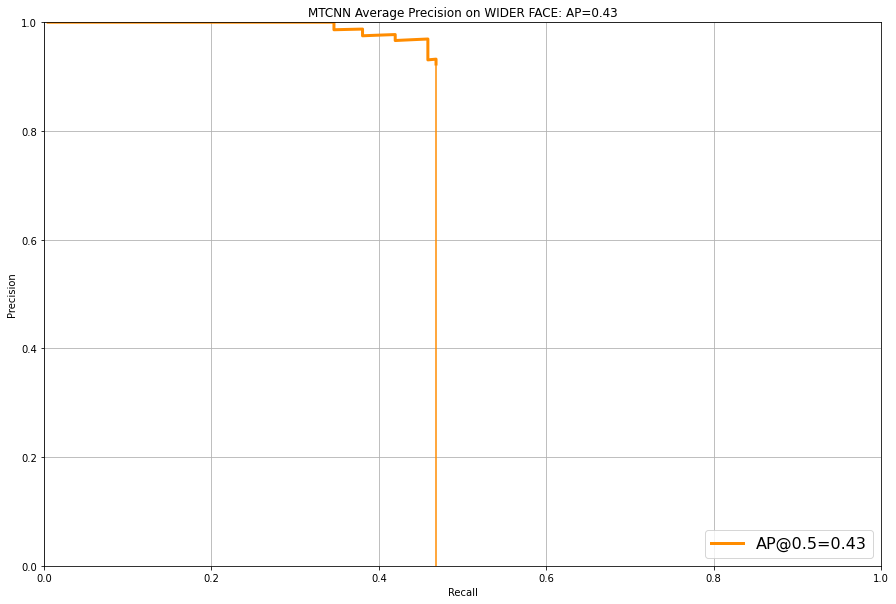

In [33]:
ap = calc_ap(df_ap['Precision@50'], df_ap['Recall@50'])

plt.plot(df_ap['Recall@50'], df_ap['Precision@50'], color='darkorange', lw=3, label="AP@0.5=%.2f" % ap)
plt.axvline(x = df_ap['Recall@50'][df_ap.index[-1]], ymax=df_ap['Precision@50'][df_ap.index[-1]], color = "darkorange")
plt.xlim(0, 1.00)
plt.ylim(0, 1.00)

plt.title('MTCNN Average Precision on WIDER FACE: AP=%.2f' % ap)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right", prop={'size': 16})
plt.grid(True)

plt.show()